![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FApplied+GenAI%2FGenerate&file=Vertex+AI+Veo+For+Video+Generation.ipynb)
<!--- header table --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20GenAI/Generate/Vertex%20AI%20Veo%20For%20Video%20Generation.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FApplied%2520GenAI%2FGenerate%2FVertex%2520AI%2520Veo%2520For%2520Video%2520Generation.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20GenAI/Generate/Vertex%20AI%20Veo%20For%20Video%20Generation.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Applied%20GenAI/Generate/Vertex%20AI%20Veo%20For%20Video%20Generation.ipynb">
      <img width="32px" src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</table>

# Generate With Veo On Vertex

https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/veo-video-generation

---
## Colab Setup

To run this notebook in Colab run the cells in this section.  Otherwise, skip this section.

This cell will authenticate to GCP (follow prompts in the popup).

In [1]:
PROJECT_ID = 'statmike-mlops-349915' # replace with project ID

In [2]:
try:
    from google.colab import auth
    auth.authenticate_user()
    !gcloud config set project {PROJECT_ID}
    print('Colab authorized to GCP')
except Exception:
    print('Not a Colab Environment')
    pass

Not a Colab Environment


---
## Installs

The list `packages` contains tuples of package import names and install names.  If the import name is not found then the install name is used to install quitely for the current user.

In [3]:
# tuples of (import name, install name, min_version)
packages = [
    ('google.genai', 'google-genai', '1.3.0'),
    ('requests', 'requests'),
    ('PIL', 'Pillow'),
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user
    elif len(package) == 3:
        if importlib.metadata.version(package[0]) < package[2]:
            print(f'updating package {package[1]}')
            install = True
            !pip install {package[1]} -U -q --user

### API Enablement

In [4]:
!gcloud services enable aiplatform.googleapis.com

### Restart Kernel (If Installs Occured)

After a kernel restart the code submission can start with the next cell after this one.

In [5]:
if install:
    import IPython
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)
    IPython.display.display(IPython.display.Markdown("""<div class=\"alert alert-block alert-warning\">
        <b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. The previous cells do not need to be run again⚠️</b>
        </div>"""))

---
## Setup

inputs:

In [6]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [7]:
REGION = 'us-central1'
SERIES = 'applied-genai'
EXPERIMENT = 'intro-veo'

# gcs bucket
BUCKET = PROJECT_ID

packages:

In [8]:
# standard packages
import io, base64, json

from IPython.display import display, HTML, Markdown

# google gen ai sdk
from google import genai


In [9]:
genai.__version__

'1.3.0'

clients:

In [10]:
#vertexai.init(project = PROJECT_ID, location = REGION)
genai_client = genai.Client(vertexai = True, project = PROJECT_ID, location = REGION)

---
## Prompts

In [11]:
text_prompt = 'A baseball in motion.'

In [12]:
response = genai_client.models.generate_images(
    model = 'imagen-3.0-generate-002',
    prompt = text_prompt,
    config = genai.types.GenerateImagesConfig(
        negative_prompt='humans and players',
        number_of_images = 1,
        include_rai_reason = True,
        output_mime_type = 'image/jpeg',
    ),
)

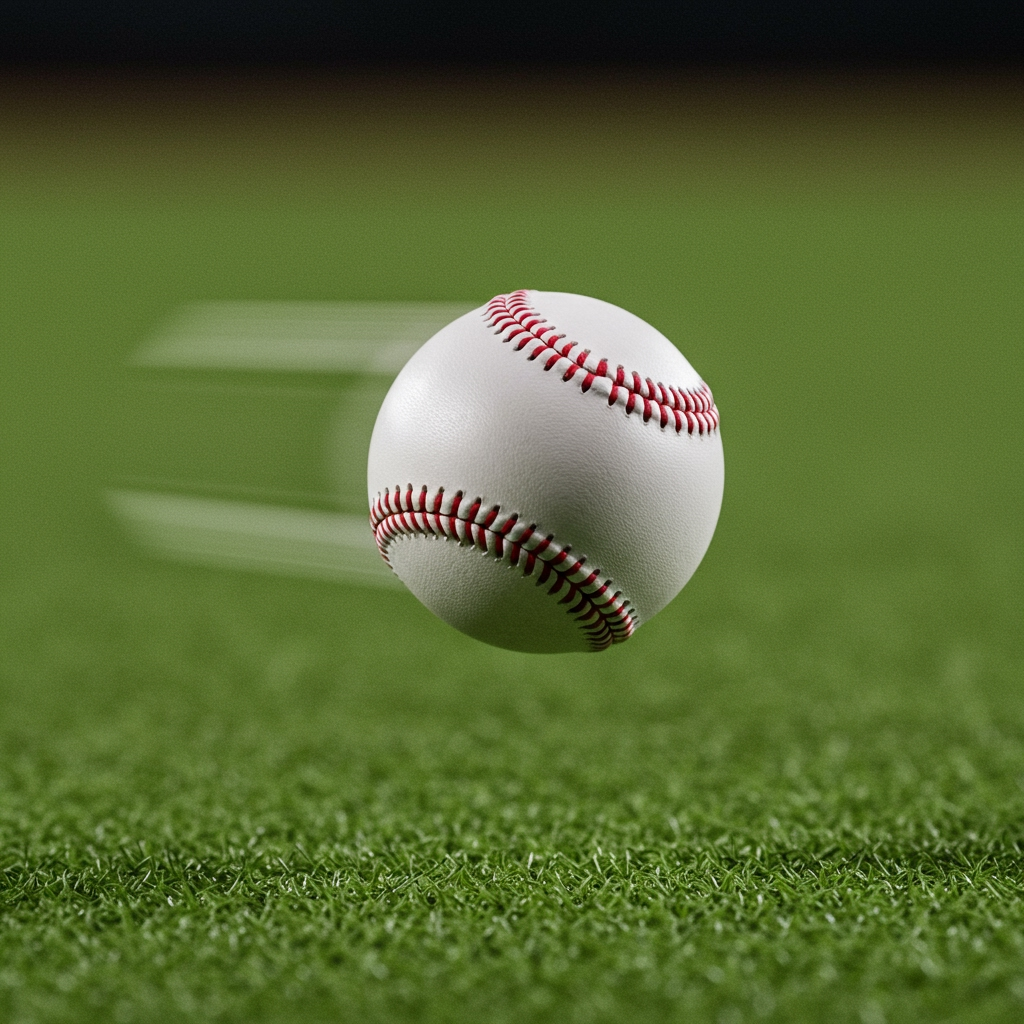

In [13]:
response.generated_images[0].image.show()

In [15]:
image_data = response.generated_images[0].image
#image_prompt = genai.types.Part.from_bytes(
#    data = image_data.image_bytes,
#    mime_type = image_data.mime_type
#)

image_prompt = base64.b64encode(image_data.image_bytes).decode('utf-8')
model = 'veo-2.0-generate-exp'

In [17]:
operation = genai_client.models.generate_videos(
    model='veo-2.0-generate-001',
    prompt = text_prompt,
    config = genai.types.GenerateVideosConfig(
        number_of_videos = 1,
        fps = 24,
        duration_seconds = 2,
        enhance_prompt = True,
    ),
)

/var/tmp/ipykernel_2288135/3626781662.py:1: ExperimentalWarning: This method is experimental and may change in future versions.
  operation = genai_client.models.generate_videos(


ClientError: 400 FAILED_PRECONDITION. {'error': {'code': 400, 'message': 'Async process failed with the following error: Feature text to video is not allowlisted for project 1026793852137.', 'status': 'FAILED_PRECONDITION'}}

Prepare the Veo API request information:

In [118]:
request = dict(
    instances = [
        dict(
            prompt = text_prompt,
            #image = dict(
            #    bytesBase64Encoded = image_prompt,
                #gcsUri = ,
            #    mimeType = image_data.mime_type
            #)
        )
    ],
    parameters = dict(
        #aspectRatio = '9:16',
        #negativePrompt = 'humans',
        #personGeneration = 'disallow',
        sampleCount = 1,
        #seed = ,
        storageUri = f'gs://{BUCKET}/{SERIES}/{EXPERIMENT}'
    )
)

In [119]:
request

{'instances': [{'prompt': 'A baseball in motion.'}],
 'parameters': {'sampleCount': 1,
  'storageUri': 'gs://statmike-mlops-349915/applied-genai/intro-veo'}}

Construct the URL for the Model, Region, and Google Cloud Project:

In [120]:
model = 'veo-2.0-generate-exp'
url = f"https://{REGION}-aiplatform.googleapis.com/v1/projects/{PROJECT_ID}/locations/{REGION}/publishers/google/models/{model}:predictLongRunning"

In [121]:
POST https://us-central1-aiplatform.googleapis.com/v1/projects/PROJECT_ID/locations/us-central1/publishers/google/models/MODEL_ID:predictLongRunning

SyntaxError: invalid syntax (1713603683.py, line 1)

Prepare the credentials token for the current user to accompany the request in the header:

In [98]:
credentials, _ = google.auth.default()
auth_req = google.auth.transport.requests.Request()
credentials.refresh(auth_req)

In [99]:
headers = {'Authorization': f'Bearer {credentials.token}', 'Content-Type': "application/json; charset=utf-8"}

### Request With `requests` Package

Workflow using the [`requests`](https://requests.readthedocs.io/en/latest/) package.

In [100]:
veo_response = requests.post(url, data = json.dumps(request), headers = headers)

In [101]:
veo_response

<Response [400]>

In [ ]:
json.loads(content)